In [1]:
import sys
sys.path.append("../")
from bandipy import simulation
import numpy as np
## For synthetic data generation
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras import backend as K

Using TensorFlow backend.


In [2]:
context_size = 10
n_actions = 10
n_samples = 10
early_frac = .70
users_rng = np.array([1000., 5000., 10000., 50000., 100000.])
n_users_rng = users_rng.copy()
n_users_rng /= early_frac
n_users_rng = n_users_rng.astype(int)
reports = list()

def make_mapping_function(n_inputs, n_outputs):
            mapping_function = Sequential()
            mapping_function.add(Dense(n_outputs,input_dim=n_inputs, activation='linear'))
            mapping_function.compile(loss='categorical_crossentropy', optimizer="sgd")
            return mapping_function
mapping_function = make_mapping_function(context_size,n_actions)
mapping_function.summary()

for n_users in n_users_rng:
    
    print("___________________"+str(n_users)+"_______________________________")
 
    sim = simulation.Simulation(data_type='syn', 
                            bandit_algorithm='contextual_linear_ucb',
                            privacy_model = 'crowd_blending_with_sampling', 
                            sim_sig = 'tmp')

    report = sim.run_simulation(n_users=n_users, early_frac=early_frac, n_samples=n_samples,
                               n_actions=n_actions, context_size=context_size,
                               ctr_scaling_factor=.1,
                               resp_noise_level=.01,
                               mapping_function = mapping_function,
                               alpha =1.,
                               cb_sampling_rate = .5,
                               neg_rew_sam_rate = .05,
                               cb_context_threshold = 10,
                               dec_digits = 1,
                               bin_size = 10)
    reports.append(report)
    np.save("_SysML_Synthetic_2_"+str(n_samples)+"_"+str(n_actions)+"_"+str(context_size)+".npy", np.array(reports))
    print("\nResults:\n",np.array(reports)) 
reports = np.array(reports)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                110       
Total params: 110
Trainable params: 110
Non-trainable params: 0
_________________________________________________________________
___________________1428_______________________________
Data Info:
Shapes: (10, 10) (10, 10)
Context_Tail: [[0.14308525 0.14922152 0.03523555 0.09184828 0.14058695 0.08271203
  0.14897573 0.1496964  0.01350653 0.04513176]
 [0.00220843 0.19881461 0.15274991 0.19858898 0.0624832  0.09389603
  0.13048023 0.03893023 0.08728432 0.03456406]]
Response_Tail: [[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
Sum of Responses: [0 0 0 0 1 0 0 0 0 0]

___________________________________________________

0 - *
50 - Dimension of received data at the Server side:
Shapes: (469, 10) (469,) (469,)

___________________________________________________

0 - 
______

0 - 1 - 1 - 2 - 2 - 3 - 3 - 4 - 4 - 5 - *
5 - 6 - 6 - 7 - 7 - 8 - 8 - 9 - 9 - 10 - *
10 - 11 - 11 - 12 - 12 - 13 - 13 - 14 - 14 - 15 - *
15 - 16 - 16 - 17 - 17 - 18 - 18 - 19 - 19 - 20 - *
20 - 21 - 21 - 22 - 22 - 23 - 23 - 24 - 24 - 25 - *
25 - 26 - 26 - 27 - 27 - 28 - 28 - 29 - 29 - 30 - *
30 - 31 - 31 - 32 - 32 - 33 - 33 - 34 - 34 - 35 - *
35 - 36 - 36 - 37 - 37 - 38 - 38 - 39 - 39 - 40 - *
40 - 41 - 41 - 42 - 42 - 43 - 43 - 44 - 44 - 45 - *
45 - 46 - 46 - 47 - 47 - 48 - 48 - 49 - 49 - 50 - *
50 - 51 - 51 - 52 - 52 - 53 - 53 - 54 - 54 - 55 - *
55 - 56 - 56 - 57 - 57 - 58 - 58 - 59 - 59 - 60 - *
60 - 61 - 61 - 62 - 62 - 63 - 63 - 64 - 64 - 65 - *
65 - 66 - 66 - 67 - 67 - 68 - 68 - 69 - 69 - 70 - *
70 - 71 - 71 - 72 - 72 - 73 - 73 - 74 - 74 - 75 - *
75 - 76 - 76 - 77 - 77 - 78 - 78 - 79 - 79 - 80 - *
80 - 81 - 81 - 82 - 82 - 83 - 83 - 84 - 84 - 85 - *
85 - 86 - 86 - 87 - 87 - 88 - 88 - 89 - 89 - 90 - *
90 - 91 - 91 - 92 - 92 - 93 - 93 - 94 - 94 - 95 - *
95 - 96 - 96 - 97 - 97 - 98 - 9

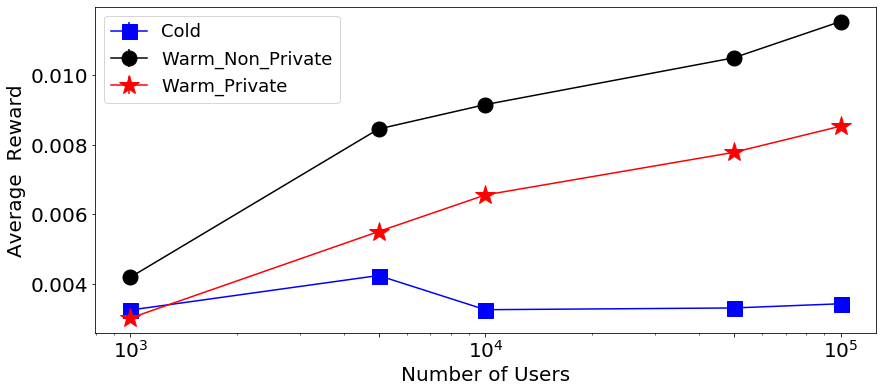

In [3]:
import matplotlib.pyplot as plt
def paint_reports(reports, users_rng):
    x_ax = users_rng
    fmts = ['bs-', 'ko-', 'r*-']
    plt.errorbar(x_ax, reports[:,0,0], reports[:,0,1]//1, fmt=fmts[0], ms=15, ecolor="blue", label="Cold")
    plt.errorbar(x_ax, reports[:,1,0], reports[:,1,1]//1, fmt=fmts[1], ms=15, ecolor="black", label="Warm_Non_Private")
    plt.errorbar(x_ax, reports[:,2,0], reports[:,2,1]//1, fmt=fmts[2], ms=20, ecolor="red", label="Warm_Private")

plt.figure(figsize=(14,6))
paint_reports(reports, users_rng)
plt.xscale('log')
plt.xlabel('Number of Users', size=20)
plt.ylabel('Average  Reward', size=20)
plt.xticks(users_rng,size=20)
plt.yticks(size=20)
plt.legend( ncol=1, prop={'size': 18})
plt.show()